<a href="https://colab.research.google.com/github/alahkdmovak/PCA-y-clasificadores-lineales/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MiniProyecto 2 - Modelos de Variable Latente y Clasificadores Lineales

**Tratamiento de Señales III**

*Estudiantes:*

*Alahkdmovak Rúa Cardona*

*Harrison Andres Henao*


**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1

In [ ]:
from google.colab import drive
import warnings
from ipywidgets import interact
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Base de datos**

In [ ]:
!wget "https://raw.githubusercontent.com/alahkdmovak/PCA-y-clasificadores-lineales/f643823eecdceb57395ebf3c85543dd8caf18633/dataFrame.csv" -O "dataFrame.csv"

--2023-05-07 23:54:39--  https://raw.githubusercontent.com/alahkdmovak/PCA-y-clasificadores-lineales/f643823eecdceb57395ebf3c85543dd8caf18633/dataFrame.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71558 (70K) [text/plain]
Saving to: ‘dataFrame.csv’

dataFrame.csv       100%[===================>]  69.88K  --.-KB/s    in 0.01s   

2023-05-07 23:54:39 (5.56 MB/s) - ‘dataFrame.csv’ saved [71558/71558]



In [ ]:
df = pd.read_csv('dataFrame.csv')
df

,Entropia,no_zero_crossings,no_mean_crossings,n5,n25,n75,n95,median,mean,std,var,rms,P_max,F_max,Media,Varianza,max_STFT,min_STFT,Energia,labels
0,8.540910,2457.0,2457.0,-0.028405,-0.014830,0.014402,0.030819,-0.000622,-1.835408e-06,0.018898,0.000357,0.015648,0.011037,25.996094,0.000487,7.373945e-07,0.011037,4.843520e-11,0.001335,Local
1,8.540910,2282.0,2282.0,-0.015640,-0.009022,0.007721,0.021198,-0.001290,-1.475312e-06,0.011802,0.000139,0.009504,0.005629,25.996094,0.000406,2.167187e-07,0.005629,1.084332e-10,0.000328,Local
2,8.540910,2594.0,2592.0,-0.013762,-0.005612,0.005172,0.014662,-0.000141,3.470603e-06,0.009355,0.000088,0.006952,0.003863,47.480469,0.000313,1.437474e-07,0.003863,4.432359e-10,0.000078,Local
3,8.489616,2652.0,2652.0,-0.019483,-0.007826,0.007659,0.019369,0.000188,1.984117e-06,0.012090,0.000146,0.009435,0.004974,32.226562,0.000374,2.633888e-07,0.004974,5.805333e-10,0.000103,Local
4,8.489616,3585.0,3585.0,-0.020306,-0.008274,0.008166,0.020380,0.000070,1.747138e-07,0.012473,0.000156,0.009840,0.004763,43.183594,0.000341,3.107104e-07,0.004763,1.368430e-09,0.000068,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,9.688312,6853.0,6853.0,-0.004259,-0.001602,0.001633,0.004102,0.000036,2.338661e-07,0.002640,0.000007,0.002014,0.001981,15.039062,0.000097,1.055117e-08,0.001981,3.353356e-11,0.000007,Telesismo
185,9.688312,12037.0,12037.0,-0.002972,-0.001153,0.001173,0.002904,0.000018,2.410427e-09,0.001878,0.000004,0.001431,0.001221,45.761719,0.000059,6.634448e-09,0.001221,1.063858e-10,0.000003,Telesismo
186,10.208617,3225.0,3225.0,-0.022433,-0.004968,0.005091,0.021863,0.000078,-8.745403e-08,0.015211,0.000231,0.009126,0.024241,1.933594,0.000243,6.027421e-07,0.024241,1.848362e-11,0.001714,Telesismo
187,10.208617,11333.0,11333.0,-0.004691,-0.001852,0.001898,0.004560,0.000051,9.396453e-08,0.002852,0.000008,0.002243,0.001534,14.179688,0.000107,1.217803e-08,0.001534,1.701899e-11,0.000013,Telesismo


## Lectura y extracción de datos del DataFrame.

> Bloc con sangría



In [ ]:
X1 = df.iloc[:, :-1].values  # Selecciona todas las columnas excepto la última
labels = df.iloc[:, -1].values   # Selecciona la última columna

# Convertir la etiqueta en un array de enteros (opcional)
scaler = StandardScaler()
scaler.fit(X1)
X= scaler.transform(X1)
# Imprimir el número de ejemplos y características
print('Número de sismos:', X.shape[0])
print('Número de características:', X.shape[1])

Número de sismos: 189
Número de características: 19


# Aplicación de PCA

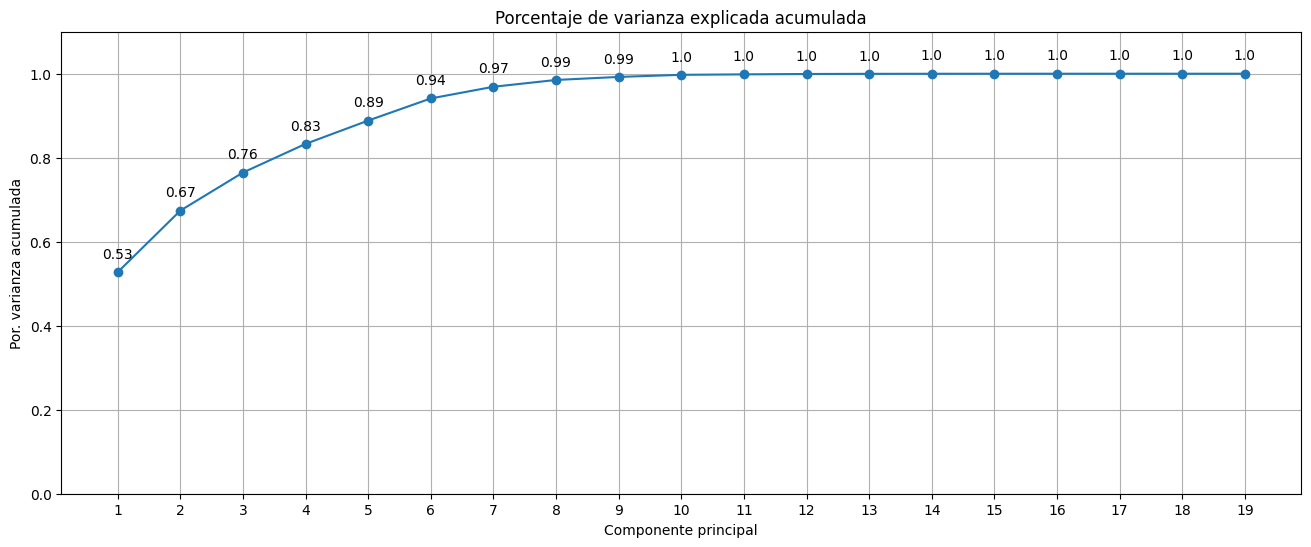

In [ ]:
featuresMatrix_DF = pd.DataFrame(X)

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(featuresMatrix_DF)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(
    np.arange(len(featuresMatrix_DF.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(featuresMatrix_DF.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');
ax.grid();

Se usó la varianza acumulativa para poder observar al rededor de cuantas componentes eran necesarias para alcanzar el 90% de la varianza del dataset. Como se puede observar en la gráfica anterior al rededor de 13 componentes se logra dicho objetivo, por lo que podríamos reducir el dataset de 42 componentes a tan solo 13 y obtener buenos resultados. Para efectos de análisis vamos a trabajar con valores de q = [2, 6, 10, 13], esto con el fin de analizar como se comporta el parámetro de accuaracy dependiendo del número de componentes que se tomen con respecto a los modelos de regresión logística y Bayesiano.

### Creamos el modelo PCA

In [ ]:
# Creamos el modelo PCA
def PcaComponents(X, n):
  pca_Components = PCA(n_components=n)
  XPCAcomponents = pca_Components.fit_transform(X)
  # print("original shape:   ", pca_2Components.shape)
  print("transformed shape:", XPCAcomponents.shape)
  return XPCAcomponents

## Aplicamos PCA y visualizamos los pares de caracteristicas para diferentes valores de q

---




### PCA (q=2)

transformed shape: (189, 2)


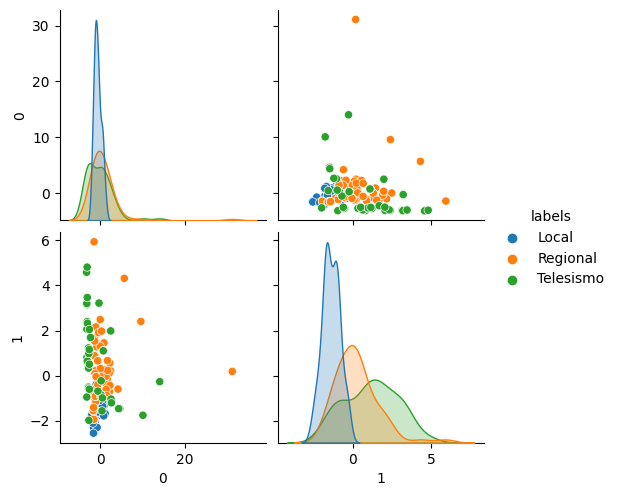

In [ ]:
import seaborn as sns
dataFramePCA= pd.DataFrame( PcaComponents(X,n=2))
dataFramePCA['labels'] = labels
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

### PCA (q=5)

transformed shape: (189, 5)


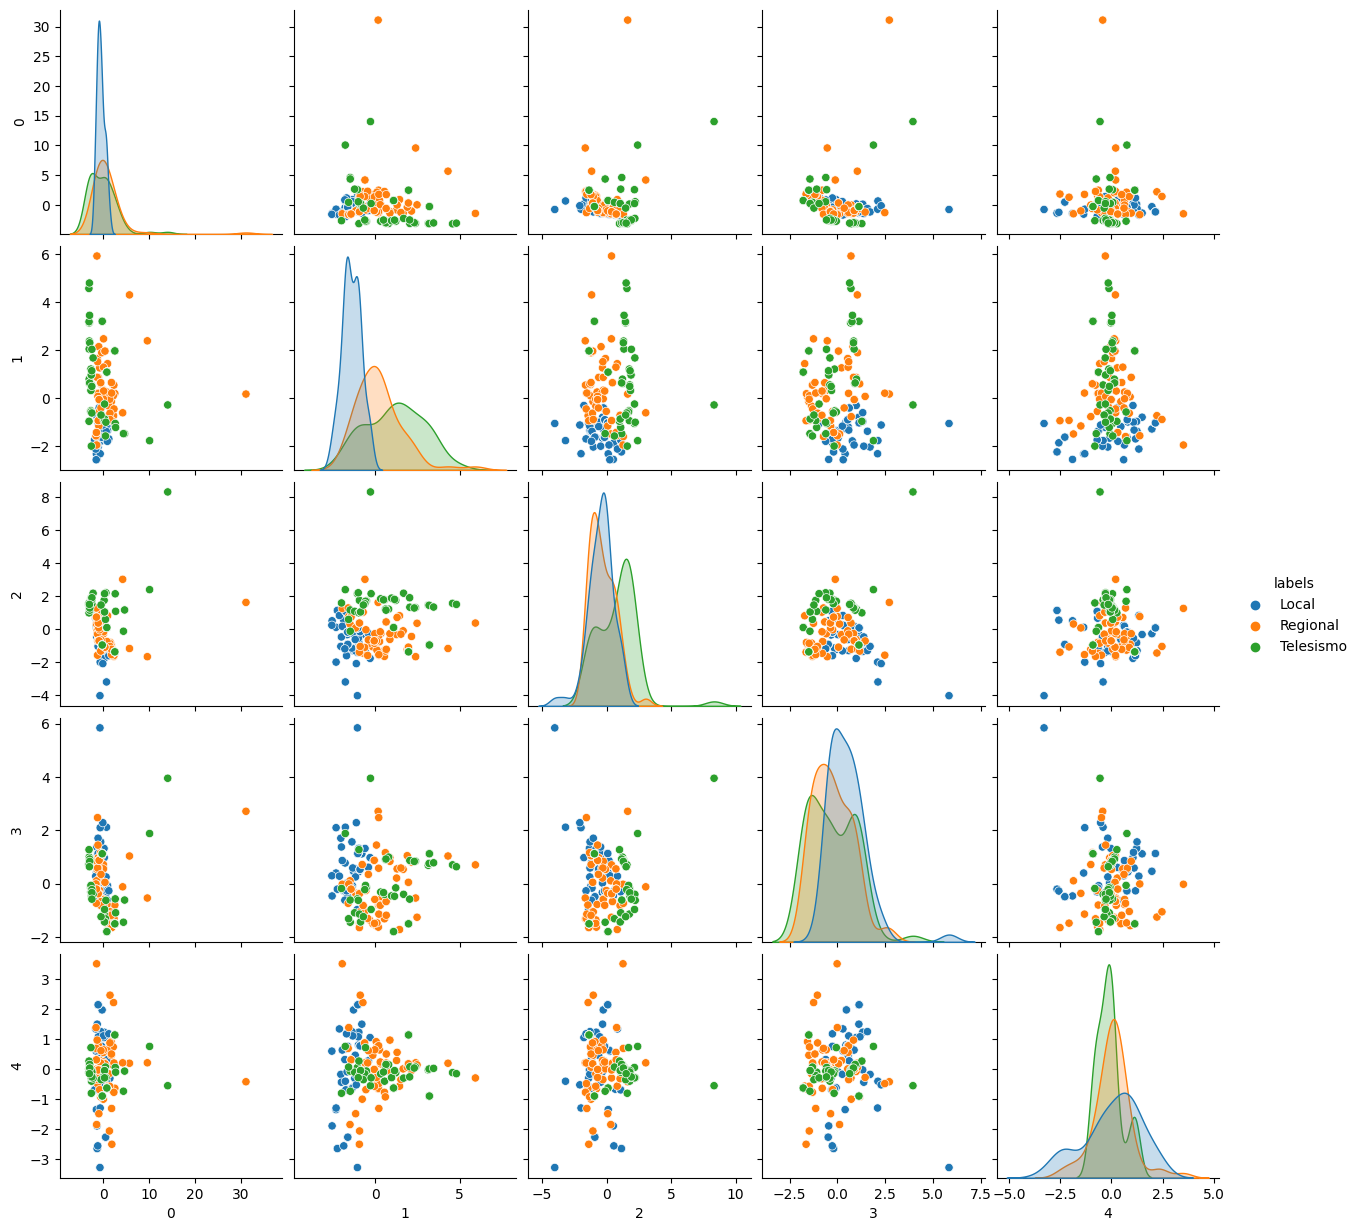

In [ ]:
dataFramePCA=pd.DataFrame(PcaComponents(X,n=5))
dataFramePCA['labels'] = labels
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

### PCA (q=10)

transformed shape: (189, 10)


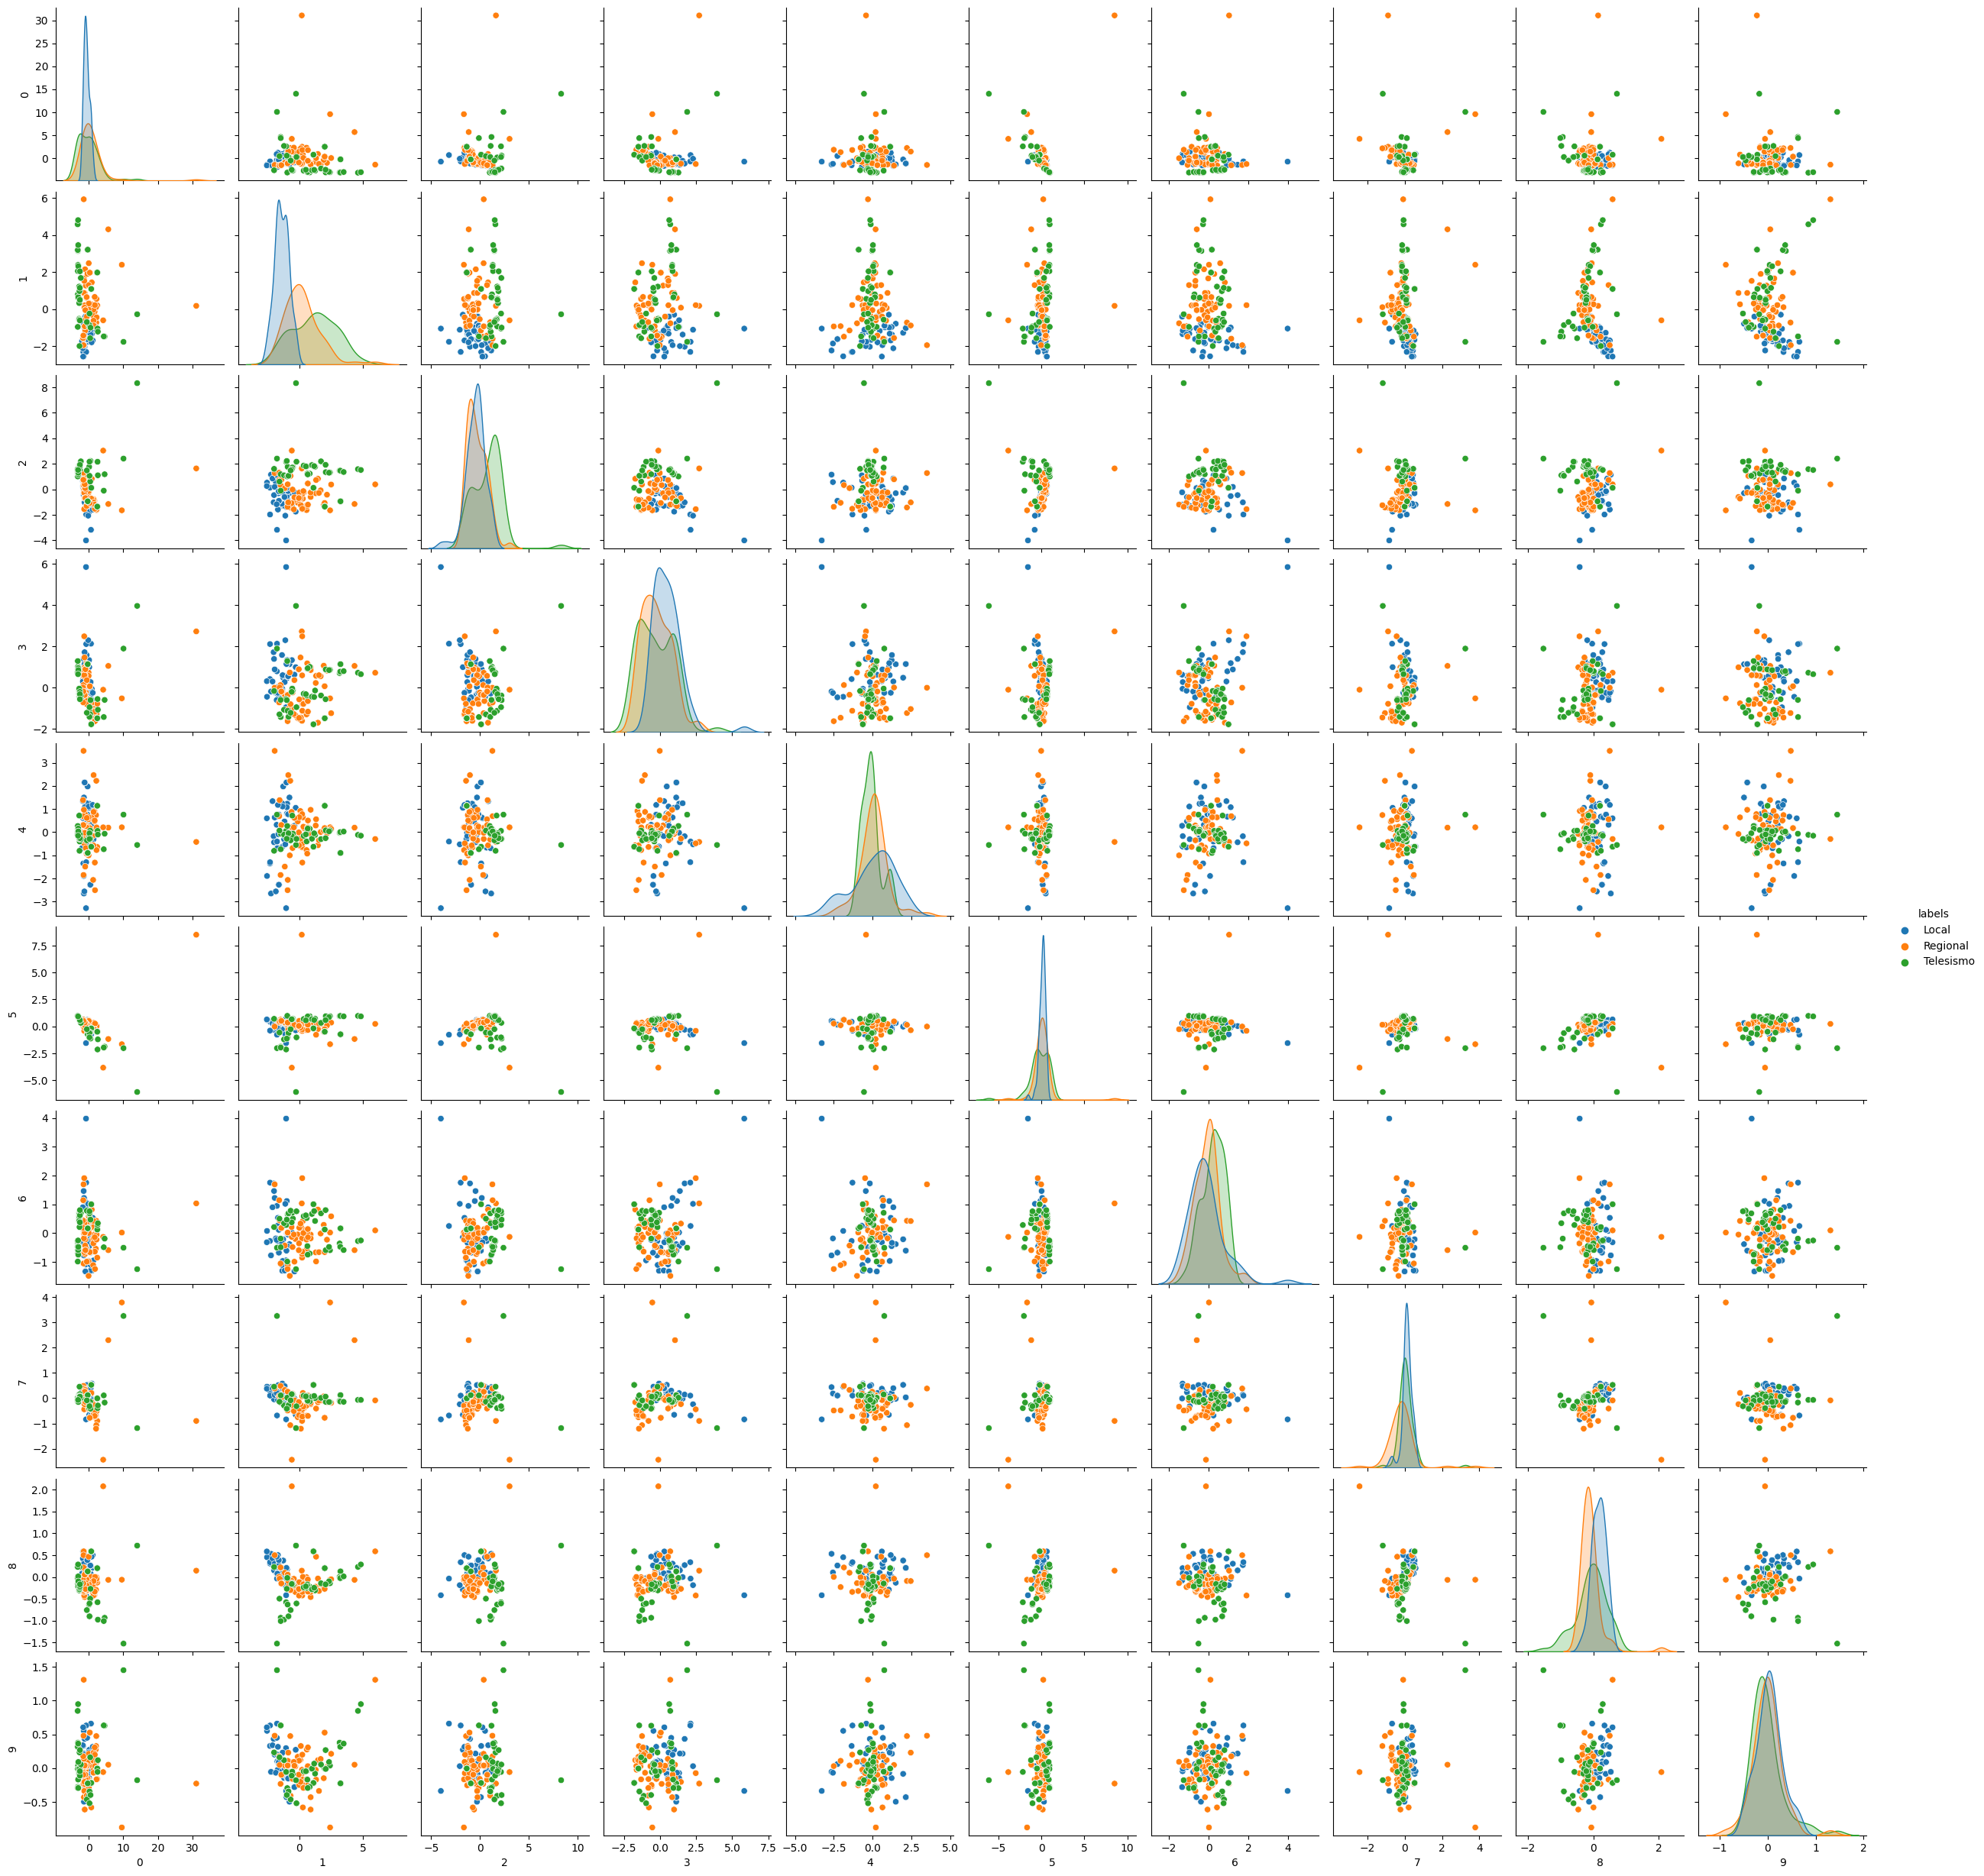

In [ ]:
dataFramePCA=pd.DataFrame(PcaComponents(X,n=10))
dataFramePCA['labels'] = labels
sns.pairplot(dataFramePCA, hue='labels', palette= 'tab10')

## Entrenamiento de modelos lineales de clasificación: Regresión Logística y clasificación Bayesiana.

In [ ]:
def Logistic_Regression(X, labels):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, labels,test_size=0.3,random_state = 3)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional']).plot(ax=ax1)
  ax1.ax_.set_title('Matriz Confusión LR Train')

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional']).plot(ax=ax2)
  ax2.ax_.set_title('Matriz Confusión LR Test')
  plt.show()
  return None

def Bayessian_Clasication2(X, t):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, labels,test_size=0.3,random_state = 3)

  # Creamos un modelo de Clasificación Bayessiana y entrenamos los datos
  clfNB = GaussianNB()
  clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, clfNB.predict(X_train))
  cMat_train = confusion_matrix(y_train, clfNB.predict(X_train))

  Acc_test = accuracy_score(y_test, clfNB.predict(X_test))
  cMat_test = confusion_matrix(y_test, clfNB.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

  ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax1)
  ax1.set_title('Matriz Confusión LR Train')
  
  ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo', 'local', 'regional']).plot(ax=ax2)
  ax2.set_title('Matriz Confusión LR Test')
  fig.tight_layout()
  plt.show()
  return None

## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

## Regresión Logística

### Desempeño  de R. Logística sin incluir PCA

Acuracy Train:  1.0
Acuracy Test:  0.8771929824561403


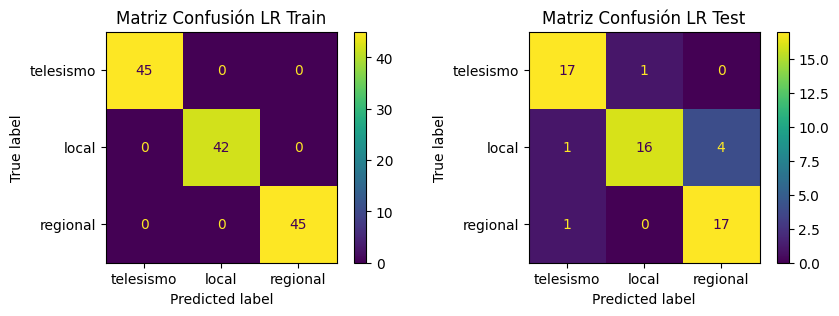

In [ ]:
Logistic_Regression(X, labels)

### Desempeño  de R. Logística con PCA = 2

transformed shape: (189, 2)
Acuracy Train:  0.7196969696969697
Acuracy Test:  0.5964912280701754


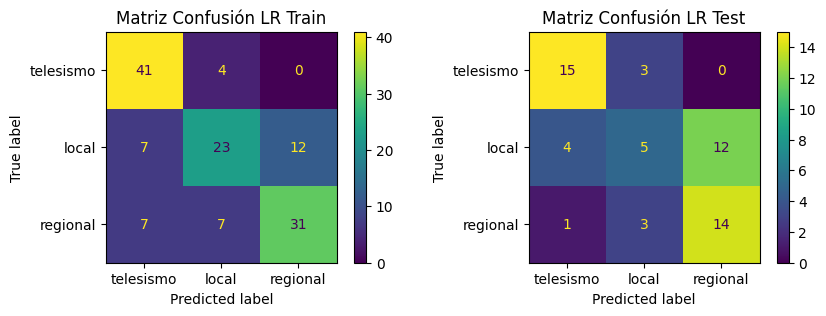

In [ ]:
Logistic_Regression(PcaComponents(X,n=2), labels)

### Desempeño  de R. Logística con PCA = 5

transformed shape: (189, 5)
Acuracy Train:  0.8409090909090909
Acuracy Test:  0.8070175438596491


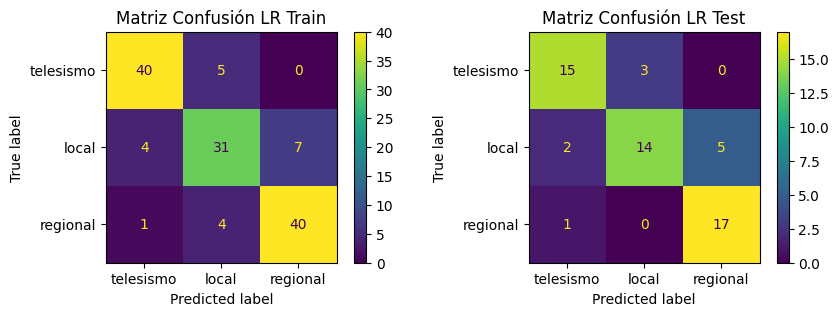

In [ ]:
Logistic_Regression(PcaComponents(X,n=5), labels)

### Desempeño  de R. Logística con PCA = 10

transformed shape: (189, 10)
Acuracy Train:  0.9318181818181818
Acuracy Test:  0.8245614035087719


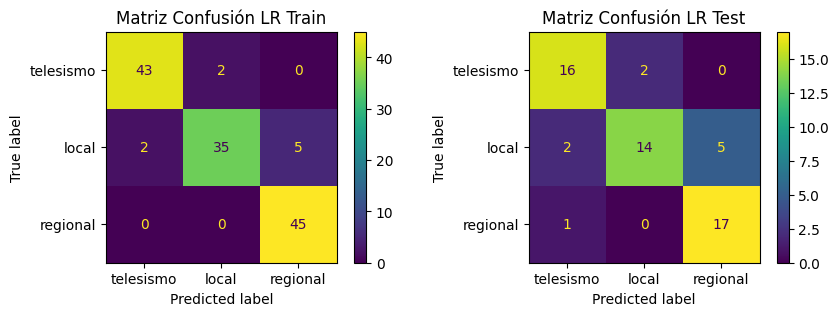

In [ ]:
Logistic_Regression(PcaComponents(X,n=10), labels)

### Desempeño  de R. Logística con PCA = 13

transformed shape: (189, 13)
Acuracy Train:  1.0
Acuracy Test:  0.8421052631578947


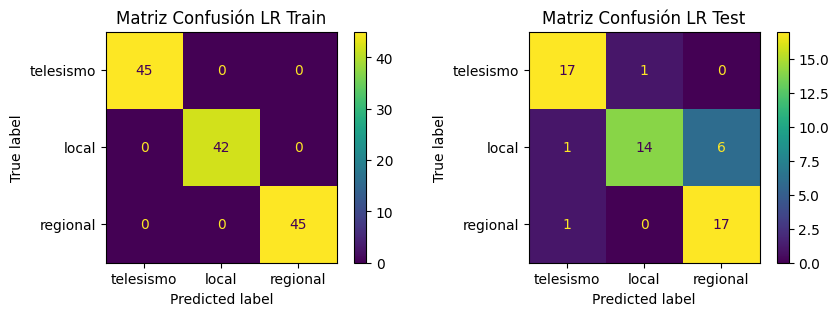

In [ ]:
Logistic_Regression(PcaComponents(X,n=13), labels)

## Clasificación Bayesiano

### Desempeño  de C. Bayesiana sin incluir PCA

Acuracy Train:  0.7272727272727273
Acuracy Test:  0.6666666666666666


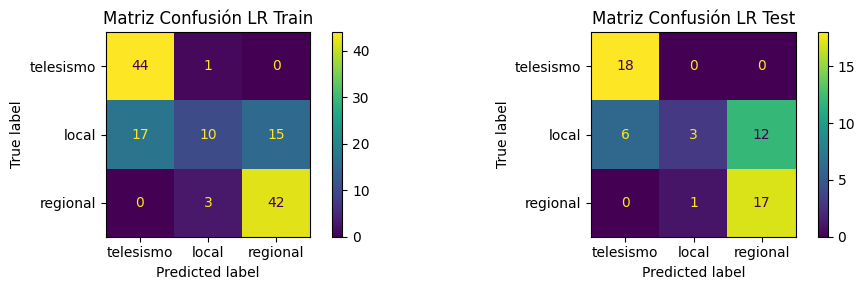

In [ ]:
Bayessian_Clasication2(X,labels)

### Desempeño  de C. Bayesiana con PCA = 2

transformed shape: (189, 2)
Acuracy Train:  0.6666666666666666
Acuracy Test:  0.631578947368421


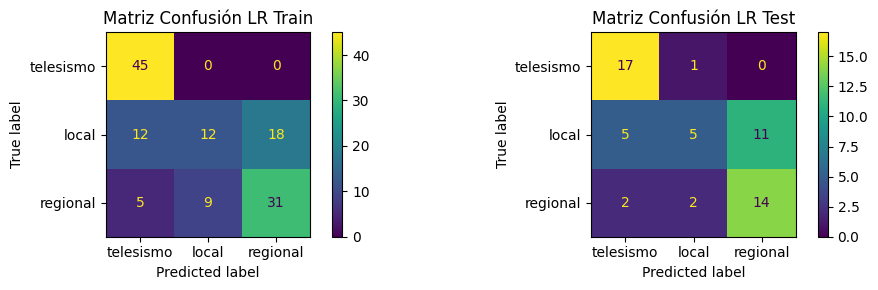

In [ ]:
Bayessian_Clasication2(PcaComponents(X,n=2), labels)

### Desempeño  de C. Bayesiana con PCA = 5

transformed shape: (189, 5)
Acuracy Train:  0.7727272727272727
Acuracy Test:  0.7192982456140351


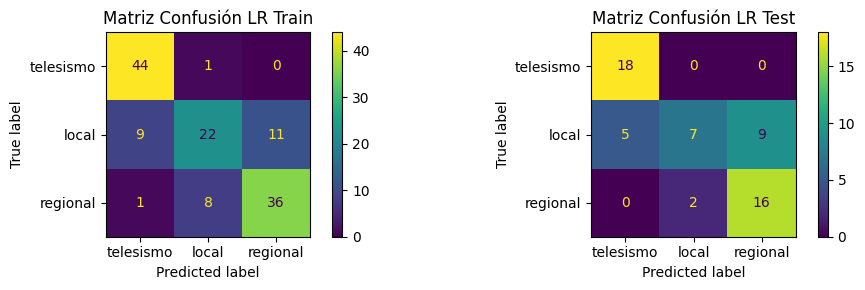

In [ ]:
Bayessian_Clasication2(PcaComponents(X,n=5), labels)

### Desempeño  de C. Bayesiana con PCA = 10

transformed shape: (189, 10)
Acuracy Train:  0.8484848484848485
Acuracy Test:  0.6666666666666666


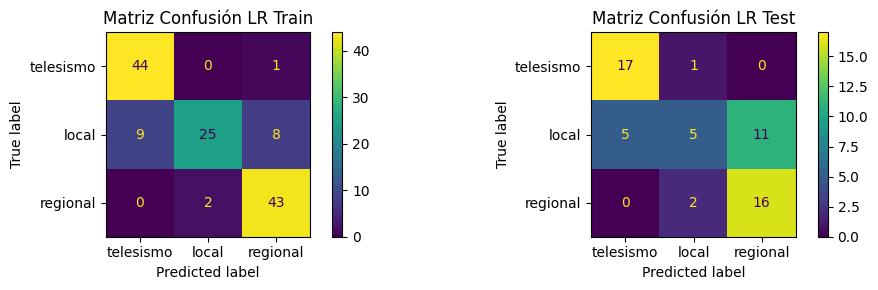

In [ ]:
Bayessian_Clasication2(PcaComponents(X,n=10), labels)

### Desempeño  de C. Bayesiana con PCA = 13

transformed shape: (189, 13)
Acuracy Train:  0.8636363636363636
Acuracy Test:  0.7017543859649122


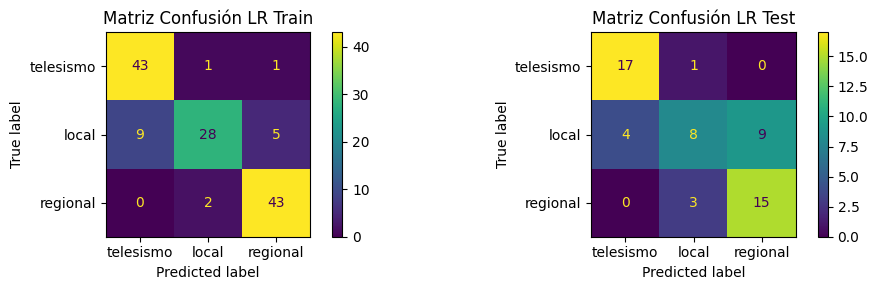

In [ ]:
Bayessian_Clasication2(PcaComponents(X,n=13), labels)

# Análisis de Resultados
Se realizaron varias visualizaciones del espacio latente obtenido mediante PCA y se llevaron a cabo pruebas de desempeño con el modelo de clasificación Bayesiano y Regresión Logística, utilizando los datos originales y diferentes componentes del espacio latente (PCA).

* Con respecto a las diferentes proyecciones del espacio latente, se observó que la mayoría de los pares de características, se agrupan y se traslapan en el centro de las sub-gráficas, esto también se puede confirmar observando la diagonal principal, donde la mayoría de las gaussianas están centradas en cero. Exceptuando, la diagonal de la componente 1, donde las gaussianas están parcialmente solapadas entre ellas y se alcanza a diferenciar cada una de ellas por separado. Permitiendo así, identificar cada tipo sismo.

* Por otro lado, en las demás sub-gráficas en las que aparentemente la mayoría de los datos están agrupados en el centro y traslapados, también se puede visualizar que hay zonas donde los datos están muy agrupados en el centro, pero no traslapados en todos sus puntos y predominan los colores (tipos de sismos) por separado, por ejemplo, en la sub-gráfica de la componente 1 (fila) vs. la componente 2 (columna) se observa como se agrupa cada color por separado permitiendo diferencia claramente cada tipo de sismo. Por lo tanto, también se puede aprovechar la identificación este tipo de patrones para lograr distinguir los tipos de sismos.

* En cuanto a las métricas de desempeño de los modelos, se encontró que la Regresión Logística sin utilizar PCA obtuvo un desempeño del 100% en los datos de entrenamiento y del 87.7% en los datos de prueba. Por otro lado, en el caso de la Regresión Logística utilizando PCA, el mejor rendimiento se logró con 13 componentes, obteniendo una precisión del 100% en los datos de entrenamiento y del 84.2% en los datos de prueba. Aunque los resultados son prometedores, se puede observar que el modelo sin utilizar PCA sigue siendo superior en términos de desempeño, ya que obtuvo mejores resultados en los datos de prueba, esto se pudo confirmar tanto en el Accuracy como en las matrices de confusión.

* En el caso del clasificador Bayesiano, se observó que la precisión en los datos de entrenamiento y prueba variaba dependiendo del número de componentes PCA utilizados. El mejor rendimiento también se logró con 13 componentes, obteniendo una precisión del 86.4% en los datos de entrenamiento y del 70.2% en los datos de prueba. A pesar de que el uso de PCA mejoró el desempeño del clasificador Bayesiano en los datos de entrenamiento y de prueba, la Regresión Logística sin PCA sigue siendo el modelo con mejor desempeño general.

* En ambos modelos sin PCA y con PCA, se obtiene un desempeño ligeramente inferior en los datos de prueba respecto a los datos de entrenamiento. Esto sugiere que los modelos pueden estar sobreentrenando los datos no generalizando bien a datos nuevos.

## **Parte 2: Reconocimiento de rostros usando el algoritmo EigenFAces**
### Base de datos

Etiquetas existentes en la base de datos: ['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']

(1867, 50, 37)
(1867, 1850)


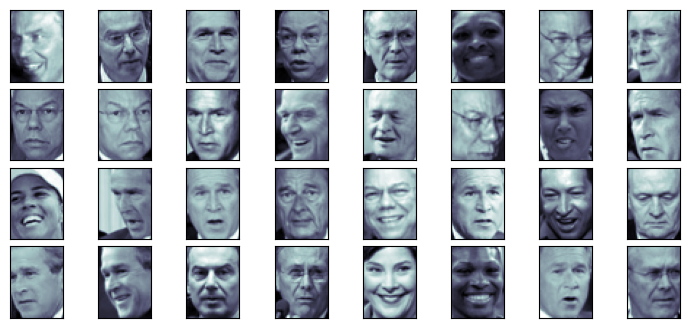

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

print("Etiquetas existentes en la base de datos: {}\n".format(faces.target_names))

data = faces.data
labels = faces.target
print(faces.images.shape)
print(faces.data.shape)

fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[0+i].reshape(50, 37), cmap='bone')

### Analisís de Componetes Principales (PCA)

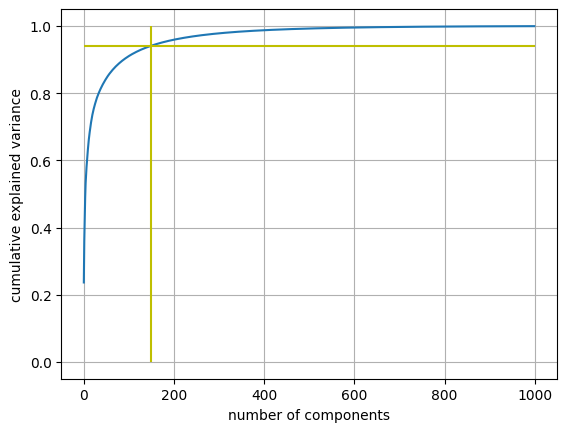

In [ ]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(150,0.,1.,colors='y')
plt.hlines(0.94,0.,1000.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()


Al graficar la varianza explicada acumulativa, es posible determinar cuántas componentes son necesarias para alcanzar el 90% de la varianza. En general, se puede decir que se necesitan al menos 100 componentes para satisfacer este requisito. Para evaluar el rendimiento a medida que se aumentan las componentes y garantizar que se trabaje con una aproximación excelente que reduzca la carga computacional, se definen los valores de $q = [40 ,80 , 100 , 150]$. Con $q=150$ se asegura obtener una varianza superior al 90% y, al mismo tiempo, se reduce la capacidad computacional necesaria en comparación con la ejecución del dataset sin aplicar la técnica PCA.

# Realizamos PCA con el número de componentes seleccionadas

In [ ]:
pca_40 = PCA(n_components=40, svd_solver='randomized').fit(data)
ComponentsPCA40 = pca_40.transform(data)

pca_80 = PCA(n_components=80, svd_solver='randomized').fit(data)
ComponentsPCA80 = pca_80.transform(data)

pca_100 = PCA(n_components=100, svd_solver='randomized').fit(data)
ComponentsPCA100 = pca_100.transform(data)

pca_150 = PCA(n_components=150, svd_solver='randomized').fit(data)
ComponentsPCA150 = pca_150.transform(data)

# Vizualización de algunas componetes

# Con 1 componente:

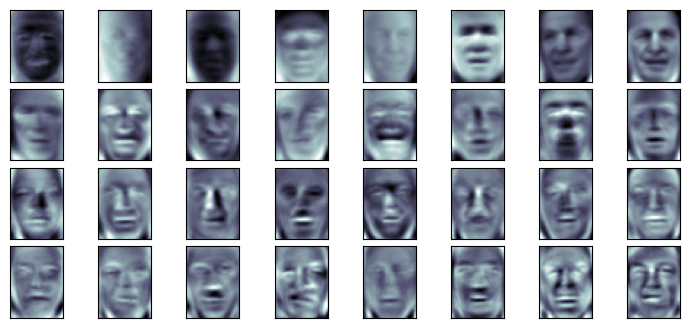

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_40.components_[0+i].reshape(50, 37), cmap='bone')

# Con 6 componentes:

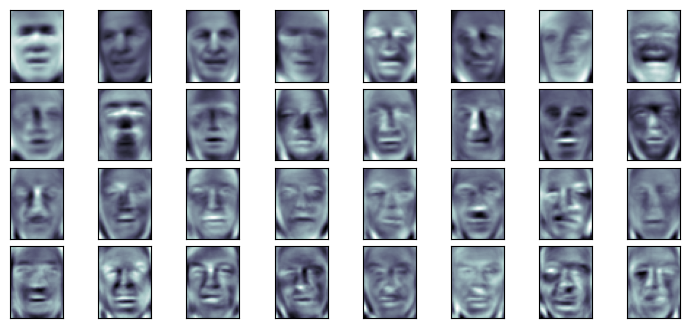

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_80.components_[5+i].reshape(50, 37), cmap='bone')

# Con 10 componentes:

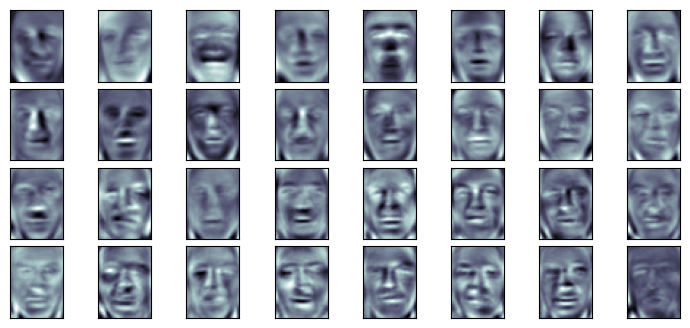

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_80.components_[10+i].reshape(50, 37), cmap='bone')

### Modelo de Regesión Logística

In [ ]:
def Logistic_Regression2(X, Y):

  #Parametro de regularización de los coeficientes del modelo
  C = [0.001, 0.01, 0.1, 1, 10, 100,1000] 

  for c in C:
    # Dividimos el conjunto de datos en Entrenamiento y Test
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state = 3)

    # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)

    # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
    Acc_train = accuracy_score(y_train, logreg.predict(X_train))
    Acc_test = accuracy_score(y_test, logreg.predict(X_test))

    print("C =",c)
    print('Acuracy Train: ',Acc_train)
    print('Acuracy Test: ',Acc_test)
    print("-------------------------------------------------------""\n")

  return None


### Desempeño Sin PCA

In [ ]:
Logistic_Regression2(data, labels)

C = 0.001
Acuracy Train:  0.3093415007656968
Acuracy Test:  0.28698752228163993
-------------------------------------------------------

C = 0.01
Acuracy Train:  0.4885145482388974
Acuracy Test:  0.41532976827094475
-------------------------------------------------------

C = 0.1
Acuracy Train:  0.8805513016845329
Acuracy Test:  0.6862745098039216
-------------------------------------------------------

C = 1
Acuracy Train:  0.9647779479326187
Acuracy Test:  0.7361853832442068
-------------------------------------------------------

C = 10
Acuracy Train:  0.9663093415007658
Acuracy Test:  0.7130124777183601
-------------------------------------------------------

C = 100
Acuracy Train:  0.9709035222052067
Acuracy Test:  0.7112299465240641
-------------------------------------------------------

C = 1000
Acuracy Train:  0.9732006125574273
Acuracy Test:  0.7112299465240641
-------------------------------------------------------



### Desempeño con PCA = 80

In [ ]:
Logistic_Regression2(ComponentsPCA80, labels)

C = 0.001
Acuracy Train:  0.30627871362940273
Acuracy Test:  0.2887700534759358
-------------------------------------------------------

C = 0.01
Acuracy Train:  0.4908116385911179
Acuracy Test:  0.43493761140819964
-------------------------------------------------------

C = 0.1
Acuracy Train:  0.8047473200612557
Acuracy Test:  0.6898395721925134
-------------------------------------------------------

C = 1
Acuracy Train:  0.9249617151607963
Acuracy Test:  0.7290552584670231
-------------------------------------------------------

C = 10
Acuracy Train:  0.9724349157733537
Acuracy Test:  0.6934046345811051
-------------------------------------------------------

C = 100
Acuracy Train:  0.9931087289433385
Acuracy Test:  0.6666666666666666
-------------------------------------------------------

C = 1000
Acuracy Train:  0.998468606431853
Acuracy Test:  0.6452762923351159
-------------------------------------------------------



### Desempeño con PCA = 100

In [ ]:
Logistic_Regression2(ComponentsPCA100, labels)

C = 0.001
Acuracy Train:  0.30627871362940273
Acuracy Test:  0.2887700534759358
-------------------------------------------------------

C = 0.01
Acuracy Train:  0.4908116385911179
Acuracy Test:  0.4385026737967914
-------------------------------------------------------

C = 0.1
Acuracy Train:  0.8254211332312404
Acuracy Test:  0.7005347593582888
-------------------------------------------------------

C = 1
Acuracy Train:  0.9509954058192955
Acuracy Test:  0.7397504456327986
-------------------------------------------------------

C = 10
Acuracy Train:  0.9915773353751914
Acuracy Test:  0.7040998217468806
-------------------------------------------------------

C = 100
Acuracy Train:  0.9992343032159265
Acuracy Test:  0.6595365418894831
-------------------------------------------------------

C = 1000
Acuracy Train:  1.0
Acuracy Test:  0.6666666666666666
-------------------------------------------------------



### Desempeño con PCA = 150

In [ ]:
Logistic_Regression2(ComponentsPCA150, labels)

C = 0.001
Acuracy Train:  0.30627871362940273
Acuracy Test:  0.2905525846702317
-------------------------------------------------------

C = 0.01
Acuracy Train:  0.49540581929555894
Acuracy Test:  0.43672014260249553
-------------------------------------------------------

C = 0.1
Acuracy Train:  0.844563552833078
Acuracy Test:  0.7112299465240641
-------------------------------------------------------

C = 1
Acuracy Train:  0.9762633996937213
Acuracy Test:  0.7379679144385026
-------------------------------------------------------

C = 10
Acuracy Train:  0.9992343032159265
Acuracy Test:  0.7237076648841355
-------------------------------------------------------

C = 100
Acuracy Train:  1.0
Acuracy Test:  0.7094474153297683
-------------------------------------------------------

C = 1000
Acuracy Train:  1.0
Acuracy Test:  0.6951871657754011
-------------------------------------------------------



## Análisis de resultados
* El análisis de reconocimiento de rostros mediante la técnica de PCA, conocida como EigenFace, permite proyectar las imágenes faciales en un espacio de menor dimensión. Comparando las imágenes faciales proyectadas en ambos espacios latentes, se pueden detectar diferencias en las características de los rostros. En la base de datos original, las imágenes faciales son más detalladas, mientras que en el espacio latente generado por PCA, las imágenes presentan una apariencia más suave y es posible identificar características comunes entre diferentes imágenes faciales. Esto se debe a que PCA simplifica el conjunto de datos original al eliminar información redundante y se enfoca en las características más relevantes para el reconocimiento facial.


* Con respecto, al desempeño obtenido con el modelo de Regesión logística. Principalmente, se observa que la precisión del modelo en el conjunto de datos de entrenamiento aumenta a medida que aumenta el valor de C, lo que indica que el modelo se está ajustando mejor a los datos de entrenamiento.

* Por otro lado, La precisión del modelo en el conjunto de datos de prueba aumenta hasta cierto punto a medida que aumenta el valor de C, pero comienza a disminuir después de un cierto punto. Esto indica que el modelo comienza a sobreentrenar los datos a medida que se aumenta el valor de C.

* Por ejemplo, se puede notar que, al utilizar valores de PCA=100 y 150, junto con un valor de regularización de C=100 o superior, el desempeño en los datos de entrenamiento alcanza un 100%. Sin embargo, a partir de estos mismos valores, se comienza a observar una disminución en el desempeño en los datos de prueba.

* Adicionalmente, el mejor desempeño en el conjunto de prueba se obtiene con C = 1 y PCA = 150 . Para este valor de C, se alcanzan los mejores resultados en términos de exactitud en el conjunto de prueba. Para valores de C y de PCA superiores, no se observa una mejora significativa en el desempeño en los datos de prueba. Además, también se tiene un buen desempeño en datos de entrenamiento con una precisión del 97.8%. En este sentido, si buscamos un equilibrio entre el desempeño en los datos de entrenamiento y en los datos de prueba, encontramos que estos son los valores más óptimos.

* En general, se puede observar que en todos los casos el desempeño en los datos de entrenamiento fue mayor que en los datos de prueba, a pesar de que se usaron diferentes valores de regularización. Esto puede deberse a que el modelo se ajustó demasiado a los datos de entrenamiento y no generalizó bien a los datos nuevos. Es importante encontrar un equilibrio entre el desempeño en los datos de entrenamiento y en los datos de prueba para que el modelo pueda generalizar bien a nuevos datos y no se sobreajuste a los datos de entrenamiento.

## Conclusiones:

- En términos generales, encontramos que la aplicación de la técnica de PCA permitió obtener una distribución más concisa de los datos y de los patrones presentes en los mismos al proyectarlos en el espacio latente. Además, la identificación de patrones relevantes en las diferentes proyecciones del espacio latente puede ser de gran utilidad para la clasificación de los distintos tipos de sismos.

- También, se puede concluir que el modelo de Regresión Logística parece tener un mejor desempeño en comparación con el modelo de Clasificación Bayesiana para los datos y el problema específico evaluado. La inclusión de PCA en ambos modelos disminuye la exactitud del modelo, aunque se puede observar una mejora gradual en el desempeño a medida que se aumenta el número de componentes de PCA utilizados.

- En el caso reconocimientos de rostros usando EigenFAce,se puede decir que el uso de PCA no tiene un impacto significativo en el desempeño del modelo cuando se utilizan valores altos de C. De hecho, se encontró que para ciertos valores de C y PCA, el desempeño en los datos de entrenamiento puede ser muy alto, pero esto no necesariamente se traduce en un buen desempeño en los datos de prueba.

- Finalmente, es importante no solo evaluar el desempeño en los datos de entrenamiento, sino también en los datos de prueba para poder determinar la capacidad de generalización del modelo. En algunos casos, un modelo puede ajustarse demasiado bien a los datos de entrenamiento, lo que puede llevar a un sobreentrenamiento y a un desempeño deficiente en los datos de prueba. Por lo tanto, se debe encontrar un equilibrio entre el ajuste y la generalización del modelo variando los diferentes parámetros.